In [1]:
using Plots
using CSV
using DataFrames
using Query
using StatsBase

In [2]:
train = CSV.read("/Users/hidehisa/.kaggle/competitions/plasticc/train_with_cluster.csv")
meta = CSV.read("/Users/hidehisa/.kaggle/competitions/plasticc/training_set_metadata.csv")
head(meta, 5)

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,615,349.046,-61.9438,320.797,-51.7537,1,0.0,0.0,0.0,NaN,0.017,92
2,713,53.0859,-27.7844,223.526,-54.4607,1,1.8181,1.6267,0.2552,45.4063,0.007,88
3,730,33.5742,-6.57959,170.456,-61.5482,1,0.232,0.2262,0.0157,40.2561,0.021,42
4,745,0.189873,-45.5867,328.254,-68.9693,1,0.3037,0.2813,1.1523,40.7951,0.007,90
5,1124,352.711,-63.8237,316.922,-51.0594,1,0.1934,0.2415,0.0176,40.4166,0.024,90


## Class 52を攻める

In [3]:
by(meta, :target, nrow)

,target,x1
,Int64⍰,Int64
1,92,239
2,88,370
3,42,1193
4,90,2313
5,65,981
6,16,924
7,67,208
8,95,175
9,62,484


In [3]:
target52 = meta[meta.target .== 52, :]
train52 = train[[o in target52.object_id for o in train.object_id], :]
head(train52, 5)

,object_id,mjd,passband,flux,flux_err,detected,cluster
,Int64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰
1,10757,59825.3,2,-0.676351,0.932761,0,2
2,10757,59825.3,1,-0.325554,1.01205,0,2
3,10757,59825.3,3,0.914359,1.87376,0,2
4,10757,59825.3,4,3.80452,2.98379,0,2
5,10757,59825.3,5,1.7235,7.11851,0,2


Union{Missing, Int64}[37661]


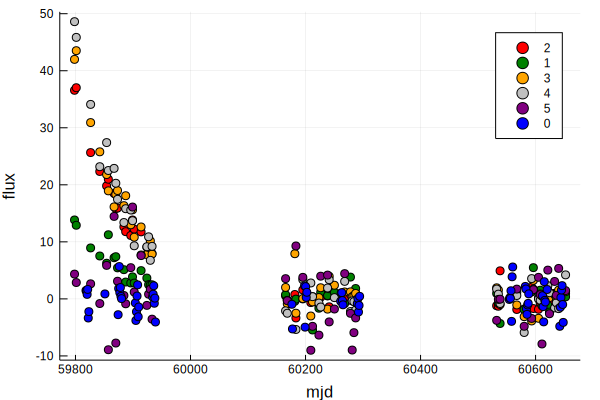

In [99]:
obj = train52[train52.object_id .== sample(unique(train52.object_id), 1), :]
p = plot(xlabel="mjd", ylabel="flux", legend=true)
c = [:blue, :green, :red, :orange, :silver, :purple]
for g in groupby(obj, :passband)
    scatter!(p, g.mjd, g.flux, label=g.passband, color=c[g.passband .+ 1])
end
println(unique(obj.object_id))
plot(p, xlabel="mjd", ylabel="flux", legend=:best)

### Class 90との違いは? 

In [13]:
target90 = meta[meta.target .== 90, :]
train90 = train[[o in target90.object_id for o in train.object_id], :]
head(train90, 5)

,object_id,mjd,passband,flux,flux_err,detected,cluster
,Int64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰
1,745,59770.4,2,0.161398,0.619084,0,1
2,745,59770.4,1,-0.699347,0.602597,0,1
3,745,59770.4,3,-1.62362,1.05104,0,1
4,745,59770.4,4,2.73215,1.80727,0,1
5,745,59770.4,5,0.529565,4.60978,0,1


Union{Missing, Int64}[68886]


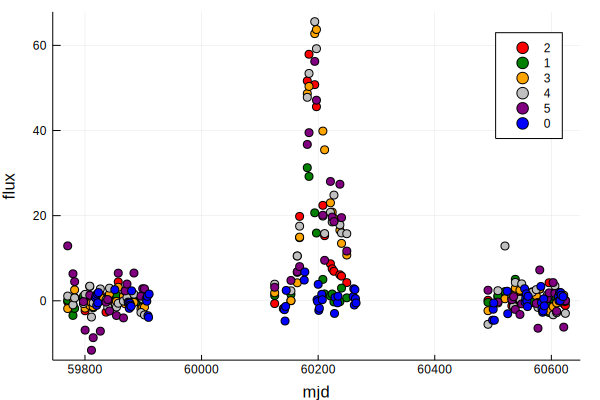

In [115]:
obj = train52[train52.object_id .== sample(unique(train52.object_id), 1), :]
p = plot(xlabel="mjd", ylabel="flux", legend=true)
c = [:blue, :green, :red, :orange, :silver, :purple]
for g in groupby(obj, :passband)
    scatter!(p, g.mjd, g.flux, label=g.passband, color=c[g.passband .+ 1])
end
println(unique(obj.object_id))
plot(p, xlabel="mjd", ylabel="flux", legend=:best)

class 67, 90, 52, 42, 62, 15 が激変星

### Class67

In [118]:
target67 = meta[meta.target .== 67, :]
train67 = train[[o in target67.object_id for o in train.object_id], :]
head(train67)

,object_id,mjd,passband,flux,flux_err,detected,cluster
,Int64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰
1,2922,59750.4,2,-0.689918,1.51775,0,0
2,2922,59750.4,1,4.16538,2.13229,0,0
3,2922,59750.4,3,-1.54457,2.31647,0,0
4,2922,59750.4,4,-7.08793,10.3705,0,0
5,2922,59752.4,2,1.12574,1.07403,0,0
6,2922,59752.4,1,-0.097938,1.1198,0,0


Union{Missing, Int64}[198669]


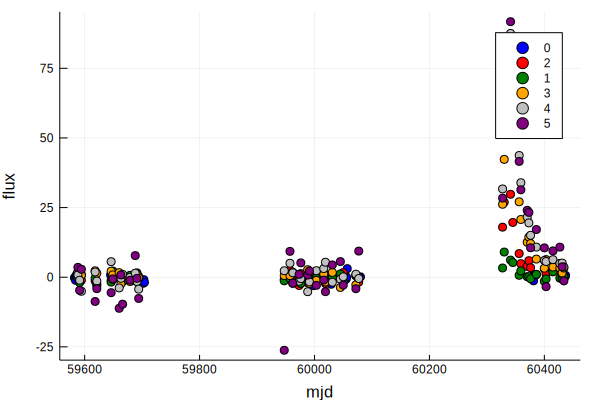

In [136]:
obj = train67[train67.object_id .== sample(unique(train67.object_id), 1), :]
p = plot(xlabel="mjd", ylabel="flux", legend=true)
c = [:blue, :green, :red, :orange, :silver, :purple]
for g in groupby(obj, :passband)
    scatter!(p, g.mjd, g.flux, label=g.passband, color=c[g.passband .+ 1])
end
println(unique(obj.object_id))
plot(p, xlabel="mjd", ylabel="flux", legend=:best)

Class 67はpassband0がほとんど激変成分なし、オーソドックスにpassbandが上がると激変成分が強くなる.ばらつき自体が少ない。

層をなすようなトレンドはみられない

### Class 62

In [122]:
target62 = meta[meta.target .== 62, :]
train62 = train[[o in target62.object_id for o in train.object_id], :]
head(train62)

,object_id,mjd,passband,flux,flux_err,detected,cluster
,Int64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰
1,3910,59770.4,2,1.10901,0.622783,0,0
2,3910,59770.4,1,0.442257,0.607388,0,0
3,3910,59770.4,3,0.023326,1.05462,0,0
4,3910,59770.4,4,1.59493,1.81147,0,0
5,3910,59770.4,5,-3.8799,4.61969,0,0
6,3910,59779.4,2,2.83596,2.05893,0,0


Union{Missing, Int64}[105345794]


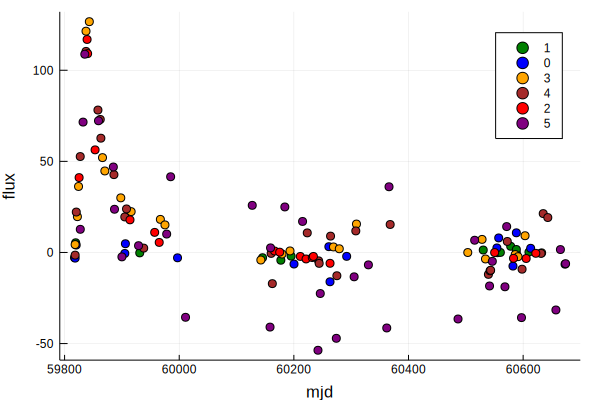

In [138]:
obj = train62[train62.object_id .== sample(unique(train62.object_id), 1), :]
p = plot(xlabel="mjd", ylabel="flux", legend=true)
c = [:blue, :green, :red, :orange, :brown, :purple]
for g in groupby(obj, :passband)
    scatter!(p, g.mjd, g.flux, label=g.passband, color=c[g.passband .+ 1])
end
println(unique(obj.object_id))
plot(p, xlabel="mjd", ylabel="flux", legend=:best)

層をなすようなトレンドが特徴、全体のvolatilityで割った値を用いるのはどうだろうか

### Class42

In [139]:
target42 = meta[meta.target .== 42, :]
train42 = train[[o in target42.object_id for o in train.object_id], :]
head(train42)

,object_id,mjd,passband,flux,flux_err,detected,cluster
,Int64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰
1,730,59798.3,2,1.17737,1.3643,0,1
2,730,59798.3,1,2.32085,1.15925,0,1
3,730,59798.3,3,2.93945,1.77133,0,1
4,730,59798.3,4,2.1281,2.61066,0,1
5,730,59798.4,5,-12.8096,5.3801,0,1
6,730,59801.4,2,0.111235,2.46058,0,1


Union{Missing, Int64}[79641012]


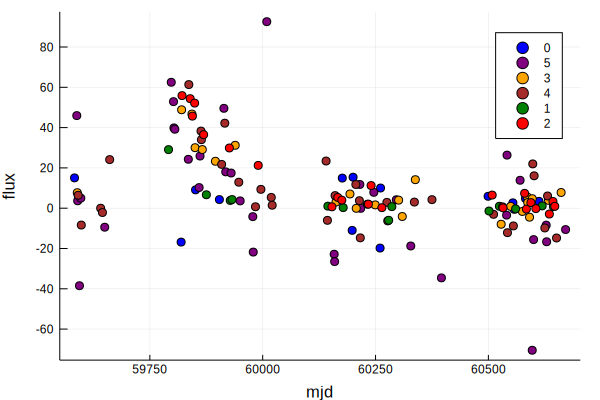

In [154]:
obj = train42[train42.object_id .== sample(unique(train42.object_id), 1), :]
p = plot(xlabel="mjd", ylabel="flux", legend=true)
c = [:blue, :green, :red, :orange, :brown, :purple]
for g in groupby(obj, :passband)
    scatter!(p, g.mjd, g.flux, label=g.passband, color=c[g.passband .+ 1])
end
println(unique(obj.object_id))
plot(p, xlabel="mjd", ylabel="flux", legend=:best)

光度が下がるまでにかかる時間が長い、全体としてばらつきが多い印象

### Class15

In [155]:
target15 = meta[meta.target .== 15, :]
train15 = train[[o in target15.object_id for o in train.object_id], :]
head(train15)

,object_id,mjd,passband,flux,flux_err,detected,cluster
,Int64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰
1,4173,59582.3,0,-3.19037,2.77237,0,1
2,4173,59583.2,0,-1.19487,2.44895,0,1
3,4173,59584.2,0,-1.20245,2.47405,0,1
4,4173,59585.2,0,5.31999,2.84509,0,1
5,4173,59586.2,0,-0.714653,3.24879,0,1
6,4173,59588.2,2,1.18305,1.14041,0,1


Union{Missing, Int64}[30144793]


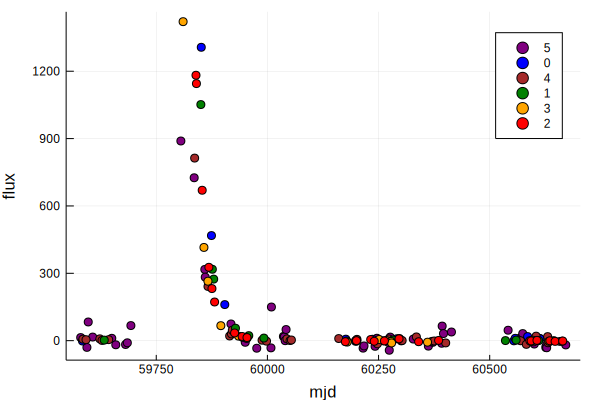

In [166]:
obj = train15[train15.object_id .== sample(unique(train15.object_id), 1), :]
p = plot(xlabel="mjd", ylabel="flux", legend=true)
c = [:blue, :green, :red, :orange, :brown, :purple]
for g in groupby(obj, :passband)
    scatter!(p, g.mjd, g.flux, label=g.passband, color=c[g.passband .+ 1])
end
println(unique(obj.object_id))
plot(p, xlabel="mjd", ylabel="flux", legend=:best)

passband0-3が高い位置にあるのがポイントの気がする

Union{Missing, Int64}[118664463]


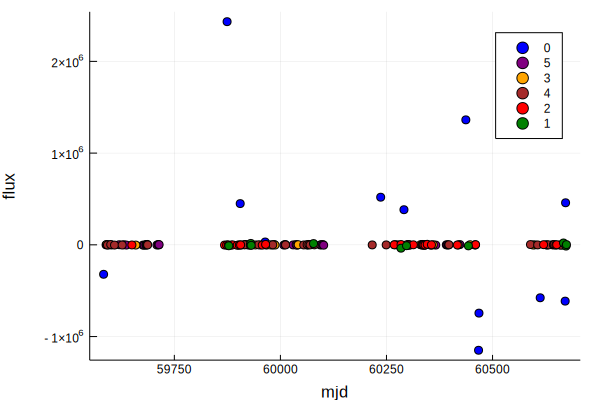

In [168]:
obj = train[train.object_id .== 118664463, :]
p = plot(xlabel="mjd", ylabel="flux", legend=true)
c = [:blue, :green, :red, :orange, :brown, :purple]
for g in groupby(obj, :passband)
    scatter!(p, g.mjd, g.flux, label=g.passband, color=c[g.passband .+ 1])
end
println(unique(obj.object_id))
plot(p, xlabel="mjd", ylabel="flux", legend=:best)

In [173]:
strange = meta[meta.object_id .== 118664463, :]

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,118664463,130.992,-43.6057,263.245,-0.608874,0,0.0,0.0,0.0,NaN,2.747,92
